In [108]:
import pandas as pd
import numpy as np

In [109]:
train_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_train_1_group.csv')

In [110]:
train_1['TPTP'] = train_1['TPGRP_TPCD'].astype(str)  + train_1['PRDN_FOM_C'].astype(str)

In [111]:
train_1['target_1'] = train_1['target']
train_1=train_1.drop(['date', 'umd', 'target'], axis=1)

In [112]:
numerical_feats = train_1.dtypes[train_1.dtypes == "float64"].index.tolist()
numerical_feats.remove('target_1')
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = train_1.dtypes[train_1.dtypes != "float64"].index.tolist()
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  47
Number of Categorical features:  18


In [113]:
numerical_feats

['LOCTN_ALTT',
 'LOCTN_GRDN',
 'EIGHT_AGL',
 '1day_mean_T3H',
 '1day_min_T3H',
 '1day_max_T3H',
 'day_mean_T3H',
 'day_min_T3H',
 'day_max_T3H',
 '1day_mean_REH',
 '1day_min_REH',
 '1day_max_REH',
 'day_mean_REH',
 'day_min_REH',
 'day_max_REH',
 '1day_mean_WSD',
 '1day_min_WSD',
 '1day_max_WSD',
 'day_mean_WSD',
 'day_min_WSD',
 'day_max_WSD',
 '1day_mean_VEC',
 '1day_min_VEC',
 '1day_max_VEC',
 'day_mean_VEC',
 'day_min_VEC',
 'day_max_VEC',
 '1day_mean_POP',
 '1day_min_POP',
 '1day_max_POP',
 'day_mean_POP',
 'day_min_POP',
 'day_max_POP',
 '1day_mean_WAV',
 '1day_min_WAV',
 '1day_max_WAV',
 'day_mean_WAV',
 'day_min_WAV',
 'day_max_WAV',
 '1day_mode_PTY',
 'day_mode_PTY',
 '1day_mode_SKY',
 'day_mode_SKY',
 '1day_sum_rain',
 '1day_max_rain',
 'day_sum_rain',
 'day_max_rain']

In [114]:
categorical_feats

['STORUNST',
 'FROR_CD',
 'FRTP_CD',
 'KOFTR_GROU',
 'DMCLS_CD',
 'AGCLS_CD',
 'DNST_CD',
 'HEIGHT',
 'PRRCK_LARG',
 'PRRCK_MDDL',
 'CLZN_CD',
 'TPGRP_TPCD',
 'PRDN_FOM_C',
 'SLANT_TYP',
 'SLDPT_TPCD',
 'SCSTX_CD',
 'SLTP_CD',
 'TPTP']

In [115]:
train_1_array=np.array(train_1)

In [116]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_1_array[:, 64]=le.fit_transform(train_1_array[:,64])
train_1_array[:, 6]=le.fit_transform(train_1_array[:,6])

In [117]:
train_1= pd.DataFrame(train_1_array, columns=train_1.columns)

In [118]:
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder

In [119]:
encoder = OrdinalEncoder(categorical_feats)
train_1[categorical_feats] = encoder.fit_transform(train_1[categorical_feats], train_1['target_1'])

In [120]:
test_1=pd.read_csv(r'C:\Users\stat_17\Desktop\svt\w_test_1_group.csv')

In [121]:
test_1['TPTP'] = test_1['TPGRP_TPCD'].astype(str)  + test_1['PRDN_FOM_C'].astype(str) 

In [122]:
test_id_1=test_1[['index', 'date', 'umd']]

In [123]:
test_1=test_1.drop(['index', 'date', 'umd'], axis=1)

In [124]:
test_1_array=np.array(test_1)

In [125]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_1_array[:, 64]=le.fit_transform(test_1_array[:,64])
test_1_array[:, 6]=le.fit_transform(test_1_array[:,6])

In [126]:
test_1= pd.DataFrame(test_1_array, columns=test_1.columns)

In [127]:
test_1[categorical_feats] = encoder.transform(test_1[categorical_feats])

In [128]:
scaler = StandardScaler()
train_1[numerical_feats] = scaler.fit_transform(train_1[numerical_feats])
test_1[numerical_feats] = scaler.transform(test_1[numerical_feats])

In [129]:
train_1['target_1']=train_1['target_1'].astype(int)

In [130]:
n_est = 2000
seed = 42
n_class = 2
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [132]:
# IsolationForest 모델 만들기
isol = IsolationForest(max_samples=100, random_state=200) 

# 만들어 둔 데이터셋에 알고리즘 피팅시키기
isol.fit(X_features)
y_pred= isol.predict(X_features)

In [133]:
isola=pd.DataFrame(y_pred, columns= ['isal'])

In [134]:
train_1=train_1.join(isola, how='inner')

In [135]:
train_1=train_1[train_1['isal']== 1]

In [136]:
train_1=train_1.drop(['isal'], axis=1)

In [137]:
X_features = train_1.iloc[:, :-1]
y_label = train_1.iloc[:, -1]

<AxesSubplot:xlabel='target_1', ylabel='count'>

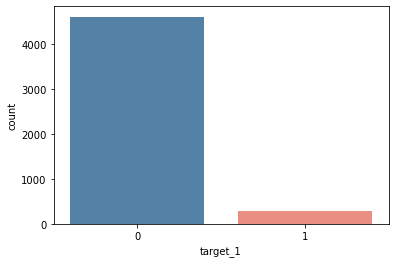

In [139]:
import seaborn as sns
colors=['steelblue','salmon']
sns.countplot(train_1['target_1'],palette=colors)

In [140]:
# shuffle1
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled1 = sklearn.utils.shuffle(X_features, random_state=2021)
y_shuffled1 =sklearn.utils.shuffle(y_label, random_state=2021)
X_train1, X_test1, y_train1, y_test1=train_test_split(x_shuffled1, y_shuffled1, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train1.shape, X_test1.shape)

(3426, 65) (1469, 65)


In [141]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled1, y_resampled1 = smote_nc.fit_resample(X_train1, y_train1)

<AxesSubplot:xlabel='target_1', ylabel='count'>

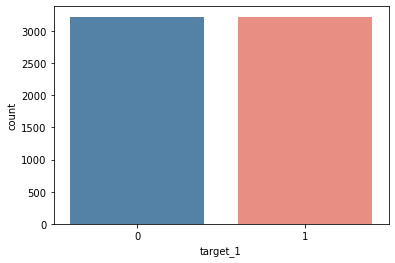

In [145]:
import seaborn as sns
colors=['steelblue','salmon']
sns.countplot(y_resampled1,palette=colors)

In [33]:
# shuffle2
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled2 = sklearn.utils.shuffle(X_features, random_state=2022)
y_shuffled2 =sklearn.utils.shuffle(y_label, random_state=2022)
X_train2, X_test2, y_train2, y_test2=train_test_split(x_shuffled2, y_shuffled2, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train2.shape, X_test2.shape)

(3426, 65) (1469, 65)


In [34]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled2, y_resampled2 = smote_nc.fit_resample(X_train2, y_train2)

In [35]:
# shuffle3
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled3 = sklearn.utils.shuffle(X_features, random_state=2023)
y_shuffled3 =sklearn.utils.shuffle(y_label, random_state=2023)
X_train3, X_test3, y_train3, y_test3=train_test_split(x_shuffled3, y_shuffled3, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train3.shape, X_test3.shape)

(3426, 65) (1469, 65)


In [36]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled3, y_resampled3 = smote_nc.fit_resample(X_train3, y_train3)

In [37]:
# shuffle4
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled4 = sklearn.utils.shuffle(X_features, random_state=2024)
y_shuffled4 =sklearn.utils.shuffle(y_label, random_state=2024)
X_train4, X_test4, y_train4, y_test4=train_test_split(x_shuffled4, y_shuffled4, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train4.shape, X_test4.shape)

(3426, 65) (1469, 65)


In [38]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled4, y_resampled4 = smote_nc.fit_resample(X_train4, y_train4)

In [39]:
# shuffle5
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled5 = sklearn.utils.shuffle(X_features, random_state=2025)
y_shuffled5 =sklearn.utils.shuffle(y_label, random_state=2025)
X_train5, X_test5, y_train5, y_test5=train_test_split(x_shuffled5, y_shuffled5, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train5.shape, X_test5.shape)

(3426, 65) (1469, 65)


In [40]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled5, y_resampled5 = smote_nc.fit_resample(X_train5, y_train5)

In [41]:
# shuffle6
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled6 = sklearn.utils.shuffle(X_features, random_state=2026)
y_shuffled6 =sklearn.utils.shuffle(y_label, random_state=2026)
X_train6, X_test6, y_train6, y_test6=train_test_split(x_shuffled6, y_shuffled6, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train6.shape, X_test6.shape)

(3426, 65) (1469, 65)


In [42]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled6, y_resampled6 = smote_nc.fit_resample(X_train6, y_train6)

In [43]:
# shuffle7
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled7 = sklearn.utils.shuffle(X_features, random_state=2027)
y_shuffled7 =sklearn.utils.shuffle(y_label, random_state=2027)
X_train7, X_test7, y_train7, y_test7=train_test_split(x_shuffled7, y_shuffled7, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train7.shape, X_test7.shape)

(3426, 65) (1469, 65)


In [44]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled7, y_resampled7 = smote_nc.fit_resample(X_train7, y_train7)

In [45]:
# shuffle8
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled8 = sklearn.utils.shuffle(X_features, random_state=2028)
y_shuffled8 =sklearn.utils.shuffle(y_label, random_state=2028)
X_train8, X_test8, y_train8, y_test8=train_test_split(x_shuffled8, y_shuffled8, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train8.shape, X_test8.shape)

(3426, 65) (1469, 65)


In [46]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled8, y_resampled8 = smote_nc.fit_resample(X_train8, y_train8)

In [47]:
# shuffle9
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled9 = sklearn.utils.shuffle(X_features, random_state=2029)
y_shuffled9 =sklearn.utils.shuffle(y_label, random_state=2029)
X_train9, X_test9, y_train9, y_test9=train_test_split(x_shuffled9, y_shuffled9, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train9.shape, X_test9.shape)

(3426, 65) (1469, 65)


In [48]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled9, y_resampled9 = smote_nc.fit_resample(X_train9, y_train9)

In [49]:
# shuffle10
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

x_shuffled10 = sklearn.utils.shuffle(X_features, random_state=2030)
y_shuffled10 =sklearn.utils.shuffle(y_label, random_state=2030)
X_train10, X_test10, y_train10, y_test10=train_test_split(x_shuffled10, y_shuffled10, test_size=0.3, random_state=2021, stratify=y_label)
print(X_train10.shape, X_test10.shape)

(3426, 65) (1469, 65)


In [50]:
from imblearn.over_sampling import SMOTENC
smote_nc = SMOTENC(categorical_features=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], random_state=0)
X_resampled10, y_resampled10 = smote_nc.fit_resample(X_train10, y_train10)

In [51]:
from catboost import CatBoostClassifier, Pool

In [52]:
train_data1 = Pool(data=X_resampled1, label=y_resampled1, cat_features=categorical_feats)
valid_data1 = Pool(data=X_test1, label=y_test1, cat_features=categorical_feats)

model_cat1 = CatBoostClassifier()
model_cat1.fit(train_data1, eval_set=valid_data1, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050208
0:	learn: 0.6408525	test: 0.6320666	best: 0.6320666 (0)	total: 211ms	remaining: 3m 30s
100:	learn: 0.1088302	test: 0.1891719	best: 0.1891719 (100)	total: 3.81s	remaining: 33.9s
200:	learn: 0.0648100	test: 0.1615098	best: 0.1615098 (200)	total: 8.01s	remaining: 31.8s
300:	learn: 0.0460247	test: 0.1542352	best: 0.1542352 (300)	total: 12.7s	remaining: 29.6s
400:	learn: 0.0354216	test: 0.1513981	best: 0.1512196 (397)	total: 17.7s	remaining: 26.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1512195587
bestIteration = 397

Shrink model to first 398 iterations.


In [53]:
train_data2 = Pool(data=X_resampled2, label=y_resampled2, cat_features=categorical_feats)
valid_data2 = Pool(data=X_test2, label=y_test2, cat_features=categorical_feats)

model_cat2 = CatBoostClassifier()
model_cat2.fit(train_data2, eval_set=valid_data2, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.0502
0:	learn: 0.6518976	test: 0.6511052	best: 0.6511052 (0)	total: 46.6ms	remaining: 46.6s
100:	learn: 0.1079436	test: 0.1752236	best: 0.1752236 (100)	total: 5.46s	remaining: 48.6s
200:	learn: 0.0684279	test: 0.1498616	best: 0.1498616 (200)	total: 10.3s	remaining: 41.1s
300:	learn: 0.0503698	test: 0.1425020	best: 0.1424661 (299)	total: 15.5s	remaining: 36s
400:	learn: 0.0380959	test: 0.1394967	best: 0.1389451 (395)	total: 20.8s	remaining: 31s
500:	learn: 0.0304618	test: 0.1385620	best: 0.1383298 (496)	total: 25.7s	remaining: 25.6s
600:	learn: 0.0247694	test: 0.1375413	best: 0.1375110 (599)	total: 30.8s	remaining: 20.5s
700:	learn: 0.0206806	test: 0.1373315	best: 0.1371527 (642)	total: 35.9s	remaining: 15.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1371526943
bestIteration = 642

Shrink model to first 643 iterations.


In [54]:
train_data3 = Pool(data=X_resampled3, label=y_resampled3, cat_features=categorical_feats)
valid_data3 = Pool(data=X_test3, label=y_test3, cat_features=categorical_feats)

model_cat3 = CatBoostClassifier()
model_cat3.fit(train_data3, eval_set=valid_data3, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050215
0:	learn: 0.6408539	test: 0.6379841	best: 0.6379841 (0)	total: 48ms	remaining: 48s
100:	learn: 0.1088770	test: 0.2005626	best: 0.2005626 (100)	total: 5.47s	remaining: 48.7s
200:	learn: 0.0643351	test: 0.1743966	best: 0.1743966 (200)	total: 10.7s	remaining: 42.4s
300:	learn: 0.0437715	test: 0.1657806	best: 0.1657806 (300)	total: 15.7s	remaining: 36.5s
400:	learn: 0.0339326	test: 0.1624097	best: 0.1622497 (391)	total: 20.7s	remaining: 30.9s
500:	learn: 0.0269230	test: 0.1609453	best: 0.1609453 (500)	total: 25.7s	remaining: 25.6s
600:	learn: 0.0220003	test: 0.1594133	best: 0.1594133 (600)	total: 30.5s	remaining: 20.3s
700:	learn: 0.0185453	test: 0.1602462	best: 0.1593267 (606)	total: 35.5s	remaining: 15.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.159326749
bestIteration = 606

Shrink model to first 607 iterations.


In [55]:
train_data4 = Pool(data=X_resampled4, label=y_resampled4, cat_features=categorical_feats)
valid_data4 = Pool(data=X_test4, label=y_test4, cat_features=categorical_feats)

model_cat4 = CatBoostClassifier()
model_cat4.fit(train_data4, eval_set=valid_data4, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.05025
0:	learn: 0.6513887	test: 0.6469907	best: 0.6469907 (0)	total: 39.7ms	remaining: 39.6s
100:	learn: 0.1021646	test: 0.1854466	best: 0.1854466 (100)	total: 5.63s	remaining: 50.1s
200:	learn: 0.0634145	test: 0.1668037	best: 0.1668037 (200)	total: 10.9s	remaining: 43.4s
300:	learn: 0.0435407	test: 0.1634481	best: 0.1631892 (290)	total: 16.1s	remaining: 37.4s
400:	learn: 0.0327243	test: 0.1624691	best: 0.1624691 (400)	total: 21s	remaining: 31.4s
500:	learn: 0.0263269	test: 0.1630907	best: 0.1624588 (401)	total: 26.3s	remaining: 26.2s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1624587588
bestIteration = 401

Shrink model to first 402 iterations.


In [56]:
train_data5 = Pool(data=X_resampled5, label=y_resampled5, cat_features=categorical_feats)
valid_data5 = Pool(data=X_test5, label=y_test5, cat_features=categorical_feats)

model_cat5 = CatBoostClassifier()
model_cat5.fit(train_data5, eval_set=valid_data5, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050196
0:	learn: 0.6500324	test: 0.6451899	best: 0.6451899 (0)	total: 45.6ms	remaining: 45.5s
100:	learn: 0.1101449	test: 0.1887994	best: 0.1887994 (100)	total: 5.79s	remaining: 51.6s
200:	learn: 0.0641151	test: 0.1571989	best: 0.1571026 (199)	total: 11.1s	remaining: 44.2s
300:	learn: 0.0465808	test: 0.1460315	best: 0.1460315 (300)	total: 16.4s	remaining: 38.1s
400:	learn: 0.0360672	test: 0.1399482	best: 0.1399482 (400)	total: 21.7s	remaining: 32.4s
500:	learn: 0.0288685	test: 0.1364345	best: 0.1364345 (500)	total: 27s	remaining: 26.8s
600:	learn: 0.0231737	test: 0.1356473	best: 0.1355613 (599)	total: 32.3s	remaining: 21.4s
700:	learn: 0.0194416	test: 0.1349123	best: 0.1349123 (700)	total: 37.6s	remaining: 16.1s
800:	learn: 0.0161630	test: 0.1362682	best: 0.1348971 (705)	total: 43s	remaining: 10.7s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1348971315
bestIteration = 705

Shrink model to first 706 iterations.


In [57]:
train_data6 = Pool(data=X_resampled6, label=y_resampled6, cat_features=categorical_feats)
valid_data6 = Pool(data=X_test6, label=y_test6, cat_features=categorical_feats)

model_cat6 = CatBoostClassifier()
model_cat6.fit(train_data6, eval_set=valid_data6, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050273
0:	learn: 0.6429956	test: 0.6396372	best: 0.6396372 (0)	total: 41.3ms	remaining: 41.2s
100:	learn: 0.1019853	test: 0.1867865	best: 0.1867865 (100)	total: 6.05s	remaining: 53.8s
200:	learn: 0.0586724	test: 0.1624996	best: 0.1624441 (199)	total: 11.5s	remaining: 45.5s
300:	learn: 0.0433252	test: 0.1565894	best: 0.1565811 (299)	total: 16.7s	remaining: 38.9s
400:	learn: 0.0324738	test: 0.1544931	best: 0.1542580 (393)	total: 22.1s	remaining: 33s
500:	learn: 0.0252903	test: 0.1536712	best: 0.1533714 (437)	total: 27.4s	remaining: 27.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1533713508
bestIteration = 437

Shrink model to first 438 iterations.


In [58]:
train_data7 = Pool(data=X_resampled7, label=y_resampled7, cat_features=categorical_feats)
valid_data7 = Pool(data=X_test7, label=y_test7, cat_features=categorical_feats)

model_cat7 = CatBoostClassifier()
model_cat7.fit(train_data7, eval_set=valid_data7, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050196
0:	learn: 0.6542231	test: 0.6491199	best: 0.6491199 (0)	total: 36.1ms	remaining: 36.1s
100:	learn: 0.1089128	test: 0.1906380	best: 0.1906380 (100)	total: 5.36s	remaining: 47.7s
200:	learn: 0.0693644	test: 0.1625299	best: 0.1625299 (200)	total: 10.4s	remaining: 41.4s
300:	learn: 0.0523839	test: 0.1531020	best: 0.1531020 (300)	total: 16.1s	remaining: 37.4s
400:	learn: 0.0401748	test: 0.1477336	best: 0.1477196 (398)	total: 21.4s	remaining: 31.9s
500:	learn: 0.0324083	test: 0.1448420	best: 0.1448420 (500)	total: 27s	remaining: 26.9s
600:	learn: 0.0260698	test: 0.1429032	best: 0.1428984 (597)	total: 32.2s	remaining: 21.4s
700:	learn: 0.0226066	test: 0.1418887	best: 0.1416888 (665)	total: 37.6s	remaining: 16.1s
800:	learn: 0.0195077	test: 0.1419801	best: 0.1414536 (743)	total: 42.5s	remaining: 10.6s
900:	learn: 0.0172783	test: 0.1414812	best: 0.1411665 (844)	total: 47.4s	remaining: 5.21s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.141166

In [59]:
train_data8 = Pool(data=X_resampled8, label=y_resampled8, cat_features=categorical_feats)
valid_data8 = Pool(data=X_test8, label=y_test8, cat_features=categorical_feats)

model_cat8 = CatBoostClassifier()
model_cat8.fit(train_data8, eval_set=valid_data8, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050219
0:	learn: 0.6543129	test: 0.6555867	best: 0.6555867 (0)	total: 49.7ms	remaining: 49.7s
100:	learn: 0.1034490	test: 0.2116530	best: 0.2116530 (100)	total: 5.59s	remaining: 49.7s
200:	learn: 0.0596898	test: 0.1871904	best: 0.1870100 (199)	total: 10.8s	remaining: 42.8s
300:	learn: 0.0415778	test: 0.1821555	best: 0.1821481 (298)	total: 16.4s	remaining: 38.2s
400:	learn: 0.0310105	test: 0.1835130	best: 0.1820819 (305)	total: 22s	remaining: 32.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1820818745
bestIteration = 305

Shrink model to first 306 iterations.


In [60]:
train_data9 = Pool(data=X_resampled9, label=y_resampled9, cat_features=categorical_feats)
valid_data9 = Pool(data=X_test9, label=y_test9, cat_features=categorical_feats)

model_cat9 = CatBoostClassifier()
model_cat9.fit(train_data9, eval_set=valid_data9, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050223
0:	learn: 0.6493094	test: 0.6414706	best: 0.6414706 (0)	total: 59.2ms	remaining: 59.1s
100:	learn: 0.1150316	test: 0.1779571	best: 0.1779571 (100)	total: 5.87s	remaining: 52.2s
200:	learn: 0.0659481	test: 0.1517590	best: 0.1517590 (200)	total: 11.2s	remaining: 44.4s
300:	learn: 0.0475283	test: 0.1467795	best: 0.1467795 (300)	total: 16.1s	remaining: 37.4s
400:	learn: 0.0364390	test: 0.1448787	best: 0.1446961 (387)	total: 21s	remaining: 31.4s
500:	learn: 0.0280198	test: 0.1459224	best: 0.1442815 (426)	total: 26.4s	remaining: 26.3s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1442815144
bestIteration = 426

Shrink model to first 427 iterations.


In [61]:
train_data10 = Pool(data=X_resampled10, label=y_resampled10, cat_features=categorical_feats)
valid_data10 = Pool(data=X_test10, label=y_test10, cat_features=categorical_feats)

model_cat10 = CatBoostClassifier()
model_cat10.fit(train_data10, eval_set=valid_data10, use_best_model=True, early_stopping_rounds=100, verbose=100)

Learning rate set to 0.050208
0:	learn: 0.6577593	test: 0.6540434	best: 0.6540434 (0)	total: 43.9ms	remaining: 43.9s
100:	learn: 0.1138479	test: 0.1765775	best: 0.1765775 (100)	total: 5.47s	remaining: 48.7s
200:	learn: 0.0684447	test: 0.1473530	best: 0.1473530 (200)	total: 10.3s	remaining: 40.8s
300:	learn: 0.0488453	test: 0.1410607	best: 0.1410588 (299)	total: 15.1s	remaining: 35.1s
400:	learn: 0.0367485	test: 0.1373558	best: 0.1372947 (397)	total: 20.1s	remaining: 30s
500:	learn: 0.0289490	test: 0.1360896	best: 0.1360681 (499)	total: 25s	remaining: 24.9s
600:	learn: 0.0238619	test: 0.1359433	best: 0.1354589 (554)	total: 29.7s	remaining: 19.7s
700:	learn: 0.0197799	test: 0.1349675	best: 0.1347823 (688)	total: 33.2s	remaining: 14.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.1347822852
bestIteration = 688

Shrink model to first 689 iterations.


In [62]:
cat_pred_test1 = model_cat1.predict_proba(data=test_1)[:,1]

In [63]:
cat_pred_test2 = model_cat2.predict_proba(data=test_1)[:,1]

In [64]:
cat_pred_test3 = model_cat3.predict_proba(data=test_1)[:,1]

In [65]:
cat_pred_test4 = model_cat4.predict_proba(data=test_1)[:,1]

In [66]:
cat_pred_test5 = model_cat5.predict_proba(data=test_1)[:,1]

In [67]:
cat_pred_test6 = model_cat6.predict_proba(data=test_1)[:,1]

In [68]:
cat_pred_test7 = model_cat7.predict_proba(data=test_1)[:,1]

In [69]:
cat_pred_test8 = model_cat8.predict_proba(data=test_1)[:,1]

In [70]:
cat_pred_test9 = model_cat9.predict_proba(data=test_1)[:,1]

In [71]:
cat_pred_test10 = model_cat10.predict_proba(data=test_1)[:,1]

In [72]:
preds1 = [ 1 if x > 0.5 else 0 for x in cat_pred_test1 ]

In [73]:
preds2 = [ 1 if x > 0.5 else 0 for x in cat_pred_test2 ]

In [74]:
preds3 = [ 1 if x > 0.5 else 0 for x in cat_pred_test3 ]

In [75]:
preds4 = [ 1 if x > 0.5 else 0 for x in cat_pred_test4 ]

In [76]:
preds5 = [ 1 if x > 0.5 else 0 for x in cat_pred_test5 ]

In [77]:
preds6 = [ 1 if x > 0.5 else 0 for x in cat_pred_test6 ]

In [78]:
preds7 = [ 1 if x > 0.5 else 0 for x in cat_pred_test7 ]

In [79]:
preds8 = [ 1 if x > 0.5 else 0 for x in cat_pred_test8 ]

In [80]:
preds9 = [ 1 if x > 0.5 else 0 for x in cat_pred_test9 ]

In [81]:
preds10 = [ 1 if x > 0.5 else 0 for x in cat_pred_test10 ]

In [82]:
cat_pred1=pd.DataFrame(preds1, columns= ['col1'])

In [83]:
cat_pred2=pd.DataFrame(preds2, columns= ['col2'])

In [84]:
cat_pred3=pd.DataFrame(preds3, columns= ['col3'])

In [85]:
cat_pred4=pd.DataFrame(preds4, columns= ['col4'])

In [86]:
cat_pred5=pd.DataFrame(preds5, columns= ['col5'])

In [87]:
cat_pred6=pd.DataFrame(preds6, columns= ['col6'])

In [88]:
cat_pred7=pd.DataFrame(preds7, columns= ['col7'])

In [89]:
cat_pred8=pd.DataFrame(preds8, columns= ['col8'])

In [90]:
cat_pred9=pd.DataFrame(preds9, columns= ['col9'])

In [91]:
cat_pred10=pd.DataFrame(preds10, columns= ['col10'])

In [92]:
cat_pred1['col1'].value_counts()

0    3258
1     152
Name: col1, dtype: int64

In [93]:
cat_pred2['col2'].value_counts()

0    3212
1     198
Name: col2, dtype: int64

In [94]:
cat_pred3['col3'].value_counts()

0    3229
1     181
Name: col3, dtype: int64

In [95]:
cat_pred4['col4'].value_counts()

0    3307
1     103
Name: col4, dtype: int64

In [96]:
cat_pred5['col5'].value_counts()

0    3225
1     185
Name: col5, dtype: int64

In [97]:
cat_pred6['col6'].value_counts()

0    3270
1     140
Name: col6, dtype: int64

In [98]:
cat_pred7['col7'].value_counts()

0    3229
1     181
Name: col7, dtype: int64

In [99]:
cat_pred8['col8'].value_counts()

0    3282
1     128
Name: col8, dtype: int64

In [100]:
cat_pred9['col9'].value_counts()

0    3333
1      77
Name: col9, dtype: int64

In [101]:
cat_pred10['col10'].value_counts()

0    3264
1     146
Name: col10, dtype: int64

In [102]:
cat_pred=cat_pred1.join(cat_pred2, how= 'inner')
cat_pred=cat_pred.join(cat_pred3, how= 'inner')
cat_pred=cat_pred.join(cat_pred4, how= 'inner')
cat_pred=cat_pred.join(cat_pred5, how= 'inner')
cat_pred=cat_pred.join(cat_pred6, how= 'inner')
cat_pred=cat_pred.join(cat_pred7, how= 'inner')
cat_pred=cat_pred.join(cat_pred8, how= 'inner')
cat_pred=cat_pred.join(cat_pred9, how= 'inner')
cat_pred=cat_pred.join(cat_pred10, how= 'inner')
cat_pred['sum']=cat_pred['col1']+cat_pred['col2']+cat_pred['col3']+cat_pred['col4']+cat_pred['col5']+cat_pred['col6']+cat_pred['col7']+cat_pred['col8']+cat_pred['col9']+cat_pred['col10']

In [103]:
cat_pred['1day_yn'] = np.where((cat_pred['sum']>=4), 1,0)

In [104]:
cat_pred['1day_yn'].value_counts()

0    3246
1     164
Name: 1day_yn, dtype: int64

In [105]:
cat_1=test_id_1.join(cat_pred, how= 'inner')

In [106]:
cat_1

,index,date,umd,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,sum,1day_yn
0,0,20200610,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
1,1,20200611,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
2,2,20200612,곤명면,0,0,0,0,0,0,0,0,0,0,0,0
3,3,20200610,곤양면,0,0,0,0,0,0,0,0,0,0,0,0
4,4,20200611,곤양면,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,3405,20200906,환여동,0,0,0,0,0,0,0,0,0,0,0,0
3406,3406,20200903,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0
3407,3407,20200904,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0
3408,3408,20200905,흥해읍,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
cat_1.to_csv('cat_1sub1_5.csv', index=False, encoding='CP949')